# DAT561 Final Project (Fall 2023)

**Note**: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.


**Part 1**: 
75 points (85 points with the extra credits in the Bonus Question)

In [141]:
import numpy as np
import pandas as pd

In [142]:
# Read the dataset here
Property_details = pd.read_csv("Property_details.csv", encoding= 'ISO-8859-1') # Please use your path and dataset for this parts!
# You may use Tkinter library
Order_details = pd.read_csv("Order_details.csv", encoding= 'ISO-8859-1')
Property_details.head(5)

,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...


### Question 1

**Part (a)**: How many properties are there in the region with the zip code of 84600? 

**Part (b)**: What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84600?


In [143]:
# Part (a):
Property_details.loc[Property_details["zipcode"]==84600, :].shape[0]

104

In [144]:
# Part (b):
#print(Property_details.loc[Property_details["zipcode"]==84600, :].describe())
print(Property_details.loc[Property_details["zipcode"]==84600, "starrating"].describe())


count    104.000000
mean       3.461538
std        0.709479
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: starrating, dtype: float64


### Question 2

**Part (a)**: Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Fri”).

**Part (b)**: Which weekday receives an above-average number of reservations compared to all records?

In [145]:
# Part (a):
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])
Order_details['weekday'] = Order_details['reservation date'].dt.strftime('%a')
Order_details.head(5)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Sat
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Sat
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Fri
3,50650317,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Sat
4,50650318,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Sat


In [146]:
# Part (b):
Order_details_1 = Order_details.groupby('weekday').agg(count=('weekday', 'count'))
mean_count = Order_details_1['count'].mean()
above_average = Order_details_1.loc[Order_details_1['count'] > mean_count,:]
above_average

,count
weekday,
Mon,26539
Thu,26589
Tue,24275
Wed,24082


### Question 3

**Part (a)**: In “roomamenities”, what are the top 10 common room amenities in single rooms (rooms with a maxoccupancy of 1)? A what about the 10 least common room amenities in single rooms? (For example, Air conditioning is one amenity)

**Part (b)**: What percentage does each type of room amenities occupy of the total number of reservations for single rooms?(Do not use the total number of amenities as denominator）

In [147]:
# filter out the single room
single_rooms = Order_details[Order_details['maxoccupancy'] == 1]
amenities = single_rooms['roomamenities'].str.replace(":", "").str.split(';').explode()


# calcuate the frequncy of each amenity
top_10_common = amenities.value_counts().head(10)
top_10_least_common = amenities.value_counts().tail(10)

#print(amenities)
print(top_10_common)
print(top_10_least_common)



Air conditioning             83913
In-room safe box             83913
                             83913
Free Wi-Fi in all rooms!     82341
Hair dryer                   61079
Telephone                    57610
Toiletries                   57397
Desk                         55988
Heating                      55773
Closet                       52029
Name: roomamenities, dtype: int64
In-room tablet               63
First aid kit                56
Air purifier                 46
Scale                        35
Internet access ï¿?LAN       26
TV [in bathroom]             24
Humidifier                   21
Vending machine              16
Hot tub                      13
Open air bath privileges     12
Name: roomamenities, dtype: int64


In [148]:
# If you displayed your output of 3(b) together with 3(a) please delete this cell
amenity_counts = amenities.value_counts()
total_reservations = len(Order_details)
percentage = (amenity_counts / total_reservations) * 100
print(percentage)

Air conditioning             50.588703
In-room safe box             50.588703
                             50.588703
Free Wi-Fi in all rooms!     49.640990
Hair dryer                   36.822750
                               ...    
TV [in bathroom]              0.014469
Humidifier                    0.012660
Vending machine               0.009646
Hot tub                       0.007837
Open air bath privileges      0.007234
Name: roomamenities, Length: 92, dtype: float64


### Question 4

**Part (a)**: For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

**Part (b)**: For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Max_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [149]:
# Part (a):
medians = Order_details[Order_details['onsiteprice'] != 0]['onsiteprice'].median()
# medians
def replace_zero(row):
    if row['onsiteprice'] == 0:
        return medians
    else:
        return row['onsiteprice']

Order_details['replaced onsiteprice'] = Order_details.apply(replace_zero, axis=1)
Reivsed_order_details=Order_details

In [150]:
# Part (b):
max_min_price = Order_details.groupby('propertycode')['replaced onsiteprice'].agg(['max', 'min'])
#print(max_min_price)
max_min_price.columns = ['Maximum', 'Minimum']
#print(max_min_price)

# Normalization
X = max_min_price['Maximum']
max_min_price['Normalized Maximum'] = (X - X.min()) / (X.max() - X.min())
max_min_price.reset_index(inplace=True)
result_df = max_min_price[['propertycode', 'Maximum', 'Minimum', 'Normalized Maximum']]
result_df = result_df.rename(columns={'propertycode': 'hotelcode'})
# # Save to CSV
result_df.to_csv('Max_Min_Price.csv', index=False)

print(result_df)


      hotelcode  Maximum  Minimum  Normalized Maximum
0            31   374.73  112.195            0.020083
1            56   149.51   73.460            0.007620
2            97   468.83  112.195            0.025290
3           138   321.84  112.195            0.017156
4           147   226.18  122.900            0.011863
...         ...      ...      ...                 ...
9092    8965616   109.50   79.370            0.005406
9093    8965903   176.03  176.030            0.009088
9094    8970542    60.28   50.230            0.002683
9095    8971223   100.32  100.320            0.004898
9096    8977298    77.36   44.200            0.003628

[9097 rows x 4 columns]


### Question 5

**Part (a)**: A party of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .

**Part (b)**: If this party does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [151]:
# Part (a):
merge_df = pd.merge(Order_details, Property_details, left_on='propertycode', right_on='propertyid', how='inner') 
#print(merge_df)
available_hotels = merge_df[(merge_df['maxoccupancy'] >= 3) & (merge_df['propertytype'] == 'Hotels') & (merge_df['closed'] == 'N') & (merge_df['hotelblock'] != 'sold out')]
# Count the unique hotels by using .nunique()
num_available_hotels = available_hotels['id'].nunique()
print(num_available_hotels)


16923


In [152]:
# Part (b):
# add anthor one constraint (merge_df['replaced onsiteprice'] <= 150)
available_and_affordable = merge_df[(merge_df['maxoccupancy'] >= 3) & (merge_df['propertytype'] == 'Hotels') & (merge_df['closed'] == 'N') & (merge_df['hotelblock'] != 'sold out') & (merge_df['replaced onsiteprice'] <= 150)]
number_of_available_and_affordable = available_and_affordable['id'].nunique()
print(number_of_available_and_affordable)


8680


### Bonus Question:

Merge data, filter, groupby, merge three times

**Part (a)**: For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Part (b)**: For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Hint**: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [153]:
# Part (a):
# merge_df
# .nlargest method syntax explanation:
# 1: This specifies that we want the top 1 row 
# 'replaced onsiteprice': This is the column based on which the largest values are determined.
merge_df = pd.merge(Reivsed_order_details, Property_details, left_on='propertycode', right_on='propertyid', how='inner') 
most_expensive_per_country = (merge_df.groupby('country').apply(lambda x: x.nlargest(1, 'replaced onsiteprice')).reset_index(drop=True).sort_values('country'))
most_expensive_per_country[['id', 'propertyname', 'starrating', 'city', 'country', 'zipcode', 'address', 'replaced onsiteprice']]



,id,propertyname,starrating,city,country,zipcode,address,replaced onsiteprice
0,69488710,Hotel Auriga,4,Lech,Austria,6764.0,Omesberg 330,823.79
1,74247055,Hotel Roosendaelhof,3,Geel,Belgium,2440.0,Stationsstraat 50,835.45
2,62123220,Aspen Golf and Ski Resort,3,Razlog,Bulgaria,2760.0,Betolovoto Aspen Golf,1129.35
3,72085681,Hotel Marmont - Adults Only,4,Split,Croatia,21000.0,Zadarska 13,14324.23
4,74459242,Hilton Park Nicosia Hotel,4,Egkomi,Cyprus,NaN,"1 Achaion Street,",541.85
5,69931926,Hotel Bila Ruze,3,Strakonice,Czech Republic,38601.0,Palackeho Namesti 80,2017.73
6,74557896,Copenhagen Island Hotel,4,Copenhagen,Denmark,1560.0,Kalvebod Brygge 53,1795.15
7,76656081,Kreutzwald Hotel Tallinn,4,Tallinn,Estonia,10122.0,Endla 23,1243.94
8,75732203,HavsVidden Resort,4,Geta,Finland,22340.0,Havsviddsvagen 90,512.37
9,74168858,Residence Pierre & Vacances Les Belles Rives,3,Argentat,France,19400.0,Residence Pierre & Vacances,12713.20


In [154]:
# Part (b):
most_cheapest_per_country = (merge_df.groupby('country').apply(lambda x: x.nsmallest(1, 'replaced onsiteprice')).reset_index(drop=True).sort_values('country'))
most_cheapest_per_country[['id', 'propertyname', 'starrating', 'city', 'country', 'zipcode', 'address', 'replaced onsiteprice']]

,id,propertyname,starrating,city,country,zipcode,address,replaced onsiteprice
0,77653595,Dolomitenhotel,3,Lienz,Austria,9900.0,2 Dolomitenstrasse,12.06
1,70220544,ibis budget Blankenberge,2,Blankenberge,Belgium,8370.0,Kerkstraat 120,35.03
2,70138124,Family Hotel Natalis,2,Hisarya,Bulgaria,4180.0,20 Geo Milev Str.,10.16
3,69915912,Hotel Aurora,3,Pula,Croatia,52100.0,Put od Fortica 98,32.73
4,75553704,Bellapais Monastery Village,3,Ozankoy,Cyprus,9944.0,Bellapais Yolu Girne,27.42
5,76535547,Hotel Praded Jesenik,2,Jesenik,Czech Republic,79001.0,Dukelska 178,14.80
6,70100944,Zleep Hotel Aarhus Nord,3,Aarhus,Denmark,8200.0,Tangen 45,50.81
7,65153747,Kreutzwald Hotel Tallinn,4,Tallinn,Estonia,10122.0,Endla 23,56.58
8,74527662,Kempeleen Moottorimaja,3,Kempele,Finland,90440.0,Sohjanantie 3,39.18
9,74348882,Appart'Hotel Cerise Carcassonne Nord,3,Carcassonne,France,11000.0,14 Route de Villemoustaussou,16.08


### Part 2 (25 Points)

For this part, we look at the logic and how you solve the problems. 

***Part (a):*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results for each question. 
    

***Part (b):***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (5 points)
    2. You need to answer these five questions using Python and the two datasets. (5 points)
    3. You need to have at least "5" graphs to visualize your insights. (6 points)
    4. Your executive summary should be well-written. (6 points)
    5. Your results and business insights should be interesting and meaningful. (3 points)


**Note**: You may use this cell to write your 5 questions

**Question 1: What kind of room type is more frequent than the others?

**Question 2: which country and city has the most properties recorded in the dataset?

**Question 3: which country has the averege highest star rating in properties?

**Question 4: what kind of property type does the people like the most?

**Question 5: what kind of rate type does customer prefer the most?


<Figure size 1000x600 with 0 Axes>

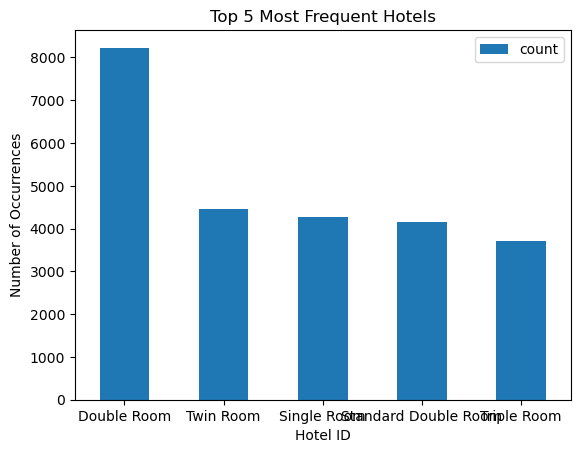

In [155]:
# Your code to answer Question 1
import matplotlib.pyplot as plt
room_type = Order_details.groupby('roomtype')['roomtype'].agg(["count"]).sort_values(by="count", ascending=False).head(5)
room_type

room_type = pd.DataFrame(room_type)
# Plotting
plt.figure(figsize=(10, 6))
room_type.plot(kind='bar')
plt.title('Top 5 Most Frequent Hotels')
plt.xlabel('Hotel ID')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.show()



country         city  
France          Paris     1636
United Kingdom  London    1209
Italy           Rome       884
                Rimini     651
Czech Republic  Prague     554
dtype: int64


<Figure size 1000x600 with 0 Axes>

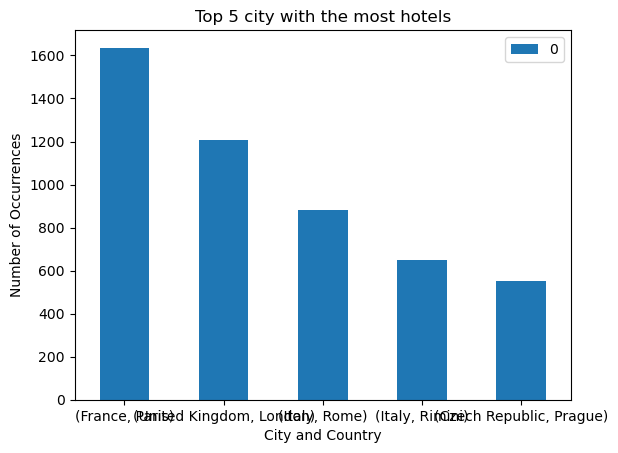

In [156]:
# Your code to answer Question 2
top_countries_cities = (Property_details.groupby(['country', 'city']).size().sort_values(ascending=False).head(5))  
print(top_countries_cities)
top_countries_cities = pd.DataFrame(top_countries_cities)
# Plotting
plt.figure(figsize=(10, 6))
top_countries_cities.plot(kind='bar')
plt.title('Top 5 city with the most hotels')
plt.xlabel('City and Country')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.show()

                                    starrating
country     city                              
Finland     Ukkohalla                      4.0
Netherlands Eelde-Paterswolde              4.0
            Capelle aan den IJssel         4.0
            Castricum                      4.0
            Cuijk                          4.0


<Figure size 1000x600 with 0 Axes>

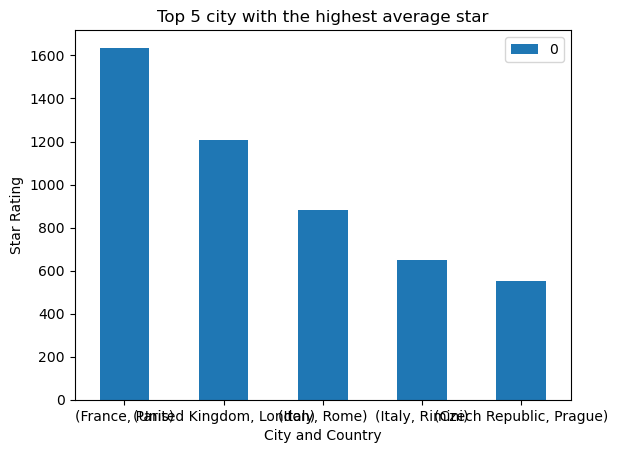

In [157]:
# Your code to answer Question 3
top_starring_countries_cities = (Property_details.groupby(['country', 'city']).agg({"starrating": "mean"}).sort_values(by="starrating",ascending=False).head(5))  

print(top_starring_countries_cities)
top_starring_countries_cities = pd.DataFrame(top_starring_countries_cities)
# Plotting
plt.figure(figsize=(10, 6))
top_countries_cities.plot(kind='bar')
plt.title('Top 5 city with the highest average star')
plt.xlabel('City and Country')
plt.ylabel('Star Rating')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

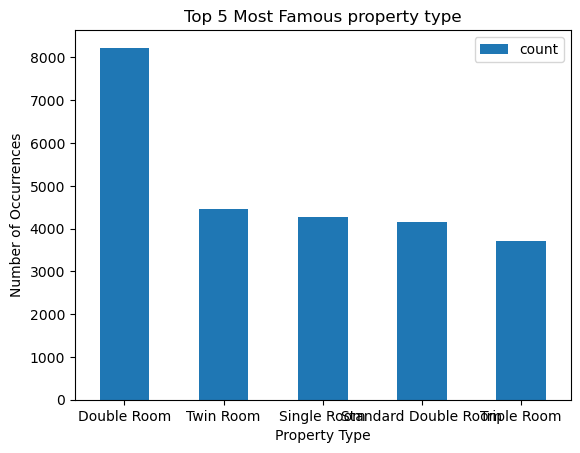

In [158]:
# Your code to answer Question 4
property_type = Property_details.groupby('propertytype')['propertytype'].agg(["count"]).sort_values(by="count", ascending=False).head(5)
property_type

property_type = pd.DataFrame(property_type)
# Plotting
plt.figure(figsize=(10, 6))
room_type.plot(kind='bar')
plt.title('Top 5 Most Famous property type')
plt.xlabel('Property Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.show()

                                                    count
ratetype                                                 
Extra low price! (non-refundable)                   51483
FREE cancellation, Pay at the hotel                 11544
Cancellation policy                                  7901
Extra low price! (non-refundable), Pay at the h...   1422
Free cancellation before November 25, 2019            724


<Figure size 1000x600 with 0 Axes>

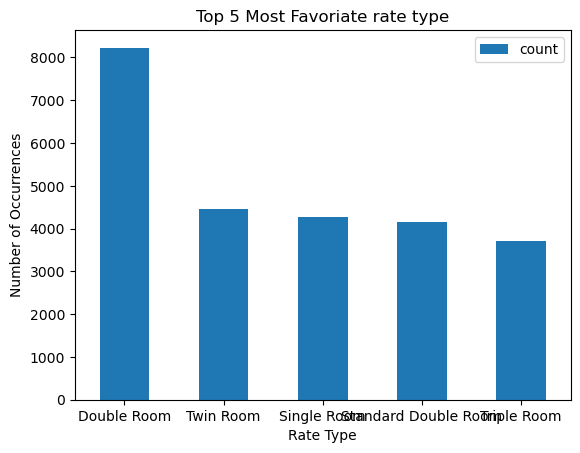

In [159]:
# Your code to answer Question 5
rate_type = Order_details.groupby('ratetype')['ratetype'].agg(["count"]).sort_values(by="count", ascending=False).head(5)
print(rate_type)

rate_type = pd.DataFrame(rate_type)
# Plotting
plt.figure(figsize=(10, 6))
room_type.plot(kind='bar')
plt.title('Top 5 Most Favoriate rate type')
plt.xlabel('Rate Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.show()

### Executive Summary & Business insights:


**Note**: You need to use the cell below to write your executive summary & business insights.
If you need more space use enter to go to the next line.


Firstly, understanding the most frequently booked room type in the current market is crucial for making informed decisions when opening a new hotel. Our analysis reveals that double rooms are the most popular choice among customers, indicating a significant demand for this room configuration. This insight suggests that focusing on double rooms when designing a new hotel could ensure tapping into a substantial market segment.

Secondly, our data shows that Paris and the UK have the highest number of hotels, but the top average star ratings are found in Finland. Furthermore, we observe a strong preference for hotels over other types of properties. This trend implies that focusing on hotel accommodations, rather than other property types, could be more profitable when considering market demand alone, without factoring in price.

Lastly, the data reveals customer preferences for extremely low-priced accommodations with non-refundable options and free cancellation policies. These two rate types emerge as the primary choices for customers. Therefore, if we aim to attract more guests as property providers, offering competitive rates with these conditions could be an effective strategy.

### Grading:

PART 1 - 75 points (85 points with the extra credits in the Bonus Question)

- Question 1: 9 points (6 points for part (a) and 3 points for part (b))
- Question 2: 15 points (9 points for part (a) and 6 points for part (b))
- Question 3: 12 points (9 points for part (a) and 3 points for part (b))
- Question 4: 21 points (9 points for part (a) and 12 points for part (b))
- Question 5: 18 points (9 points for part (a) and 9 points for part (b))
- Bonus Question: 10 points (extra credit): (8 points for part (a) and 2 points for part (b))




PART 2 - 25 points 
- You need to ask five business-related questions (5 points).
- You need to answer these five questions using Python and the two datasets (5 points).
- You need to have at least "5" graphs to visualize your insights (6 points).
- Your executive summary should be well-written (6 points).
- Your results and business insights should be interesting and meaningful (3 points).


Good Luck!